In [249]:
import numpy as np
import matplotlib.pyplot as plt

In [250]:
from timeit import default_timer as timer

In [251]:
# let's fix seed value to 1000
np.random.seed(1000)


In [252]:
# let's create a matrix A of size (1000,10)
A=np.random.randn(1000,10)
print('shape of A matrix',A.shape)


shape of A matrix (1000, 10)


In [253]:
# let's define a random vector x
x=[]
for i in range(10):
  if (i+1)%2!=0:
    x.append(np.random.uniform(-(i+1),-i))
  else:
    x.append(np.random.uniform(i,i+1))  
x=np.array(x).reshape(10,1) 
x_bar=x
 # creating a vector of shape (10,1)  
print('shape of x vector',x.shape)


shape of x vector (10, 1)


In [254]:
# creating a epsilon
epsilon=np.random.randn(1000,1)
print('shape of epsilor vector',epsilon.shape)


shape of epsilor vector (1000, 1)


In [255]:
# calculating y value
y=np.add(np.matmul(A,x),epsilon)
print('shape of y vector',y.shape)

shape of y vector (1000, 1)


$min_
x
f(x) = 12∥Ax − y∥_2^2
.$

**. Write Python functions using appropriate numpy routines to compute the objective function value, the gradient
value and the Hessian of f.**

**Function value**

In [256]:
def evalf(x):
  assert type(x) is np.ndarray and len(x)==10
  inner_part=(np.matmul(A,x)-y)
  return 12*(np.linalg.norm(inner_part))**2

**Gradient value**

In [257]:
def evalg(x):
  assert type(x) is np.ndarray and len(x)==10
  first_part=np.matmul(np.matmul(A.transpose(),A),x)
  second_part=np.matmul(A.transpose(),y)
  return (first_part-second_part)

** Hessian value**

In [258]:
def evalh(x):
  assert type(x) is np.ndarray and len(x)==10
  return np.matmul(A.transpose(),A)


In [259]:
def compute_D_k(x):
  assert type(x) is np.ndarray and len(x) == 10
  if np.linalg.det(evalh(x)) == 0:
    raise ValueError('Determinant of Hessian is zero')
  return np.linalg.inv(evalh(x))

In [260]:
def compute_steplength_backtracking_scaled_direction(x, gradf, alpha_start, rho, gamma, B_k): 
  assert type(x) is np.ndarray
  assert type(gradf) is np.ndarray
   
  n = len(x)
  alpha = alpha_start
  p = - gradf 
  D_k = B_k
  while evalf(x + alpha*np.matmul(D_k,p)) > evalf(x) + gamma * alpha* (np.matmul(np.matrix.transpose(gradf), np.matmul(D_k,p)) ):
    alpha = alpha * rho
  return alpha  

In [261]:
BACKTRACKING_LINE_SEARCH = 1
CONSTANT_STEP_LENGTH=2
EXACT_LINE_SEARCH=3

In [262]:
def find_minimizer_Newton(start_x, n, tol, line_search_type, *args):
  assert type(start_x) is np.ndarray and len(start_x) == n
  assert type(tol) is float and tol>=0 
  
  x = start_x
  g_x = evalg(x)
  h_x = evalh(x)
  x_iter = []
  if line_search_type == BACKTRACKING_LINE_SEARCH:
      alpha_start = float(args[0])
      rho = float(args[1])
      gamma = float(args[2])

  k = 0
  step_length = 1.0
  while (np.linalg.norm(g_x) > tol): 
    D_k = np.linalg.inv(evalh(x))
    step_length = compute_steplength_backtracking_scaled_direction(x, g_x, alpha_start, rho, gamma, D_k)

    x = np.subtract(x, np.multiply(step_length,np.matmul(D_k, g_x))) #update x = x - step_length*g_x
    x_iter.append(x)
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point
  return x, x_iter,k

In [263]:
n = 10
my_start_x = np.array([0 for i in range(10)])
my_start_x = my_start_x.reshape(10,1)
my_tol  = 10**(-4)
alpha =float(0.99)
rho=0.5
gamma=0.5

**Let x  be the final optimal solution provided by your algorithm. Report thevalues of x and ¯x, and discuss the observations.**

In [264]:
time_start=timer()
x_star,x_iter,iterations=find_minimizer_Newton(my_start_x,n,my_tol,BACKTRACKING_LINE_SEARCH,alpha,rho,gamma)
time_end=timer()
time_taken_newton=time_end-time_start
print('time taken by newton methosd is: ',time_taken_newton)
print('iteations taken by newton metbod is:',iterations)

time taken by newton methosd is:  0.008049338999626343
iteations taken by newton metbod is: 5


In [265]:
for i in range(10):
  print('x_bar',i+1,'th value is',x_bar[i],'And value of',i+1,' x_star is:',x_star[i])

x_bar 1 th value is [-0.06258705] And value of 1  x_star is: [-0.04982253]
x_bar 2 th value is [1.94307072] And value of 2  x_star is: [1.95189743]
x_bar 3 th value is [-2.34150552] And value of 3  x_star is: [-2.34298192]
x_bar 4 th value is [3.58252615] And value of 4  x_star is: [3.60956007]
x_bar 5 th value is [-4.75947573] And value of 5  x_star is: [-4.71176195]
x_bar 6 th value is [5.93512469] And value of 6  x_star is: [5.89877618]
x_bar 7 th value is [-6.61893094] And value of 7  x_star is: [-6.62879358]
x_bar 8 th value is [7.16818187] And value of 8  x_star is: [7.16821112]
x_bar 9 th value is [-8.2179964] And value of 9  x_star is: [-8.22221199]
x_bar 10 th value is [9.00022174] And value of 10  x_star is: [9.05669293]


$\text{As we can see that our model is not properly appro}$

$\text{Plot the values} \ log(||x^
k − x^*||_2) \  against  \ iterations \  k = 0, 1, 2, . . ..$

In [266]:
import math

In [267]:
ln_values=[]
ln_values_fun=[]
for i in range(iterations-1):
  a=np.linalg.norm(x_iter[i]-x_star)
  b=np.linalg.norm(evalf(x_iter[i])-evalf(x_star))

  ln_values.append(math.log(a))
  ln_values_fun.append(math.log(b))

print(ln_values)  
print(ln_values_fun)

[-1.7143669160943475, -6.319538092083591, -10.924807283185778, -15.539927800970789]
[6.084730898753019, -3.1256094733713256, -12.335950160717971, -21.552101118495877]


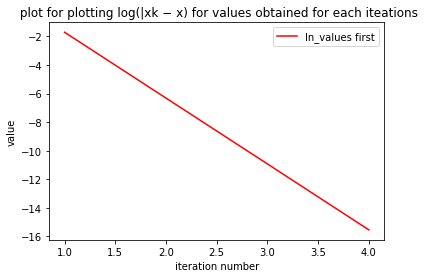

In [268]:
plt.plot([i+1 for i in range(iterations-1)],ln_values,label='ln_values first',color='r')
plt.title(' plot for plotting log(|xk − x) for values obtained for each iteations')
plt.xlabel('iteration number')
plt.ylabel("value")
plt.legend()
plt.show()

$\text{Prepare a different plot for plotting log} (|f(x_k
) − f(x^*)|) \\ \text{ obtained from Newton’s method against the
iterations.}$


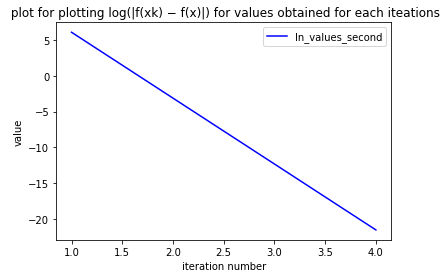

In [269]:
plt.plot([i+1 for i in range(iterations-1)],ln_values_fun,label='ln_values_second',color='b')
plt.title(' plot for plotting log(|f(xk) − f(x)|) for values obtained for each iteations')
plt.xlabel('iteration number')
plt.ylabel("value")
plt.legend()
plt.show()

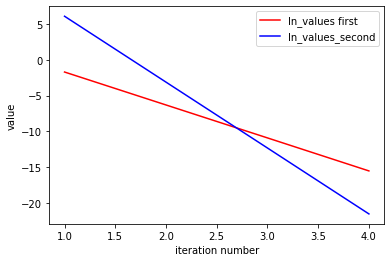

In [270]:
plt.plot([i+1 for i in range(iterations-1)],ln_values,label='ln_values first',color='r')
plt.plot([i+1 for i in range(iterations-1)],ln_values_fun,label='ln_values_second',color='b')
plt.xlabel('iteration number')
plt.ylabel("value")
plt.legend()
plt.show()

$\text{Comment on the convergence rates of the iterates and the objective function values, by recalling the
definitions given above.}$



Since we know that The condition of Q-Linear is :$\frac{||x^{k+1} - x^*||_2}{||x^{k} - x^*||_2}\leq r$, Where $r\in(0,1)$

now taking log both side, we obtain
$$log(||x^{k+1} - x^*||_2)-log(||x^k - x^*||_2)\leq log(r)$$


Since $r\in (0,1)$

⇒ $log(r)< 0$ 

Hence the condition of Q-Linear becomes:

⇒ $$log(||x^{k+1} - x^*||_2)-log(||x^k - x^*||_2)\leq 0$$

From the above plots, we can observe that at each iteration value is decreased so :

$log(||x^{k+1} - x^*||_2)-log(||x^k - x^*||_2)$ is negative. 

similarly ,
$log(||f(x^{k+1}) - f(x^*)||_2)-log(||f(x^k) - f(x^*)||_2)$ is negative.


Hence, according to definition we can say that the Convergence of the function is Q-Linear.



$\large \text{Question 3:} \\ \text{. [R] With a starting point of } \\ 
x_0 =[0 0 . . . 0]^T∈ R^
{10}, \text{ solve problem (1) using the BFGS method implemented
in the previous lab with backtracking line search (use} α_
0 = 0.99, ρ = 0.5, γ = 0.5 \\ \text{ for backtracking line search
and τ = 10−4
).}
$

In [271]:
def compute_steplength_backtracking(n,x, gradf, direction, alpha_start, rho, gamma):
  assert type(x) is np.ndarray and len(x) == n 
  assert type(gradf) is np.ndarray and len(gradf) == n  
  assert type(direction) is np.ndarray and len(gradf) == n
  assert type(alpha_start) is float and alpha_start>=0. 
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0. 
  
  alpha = alpha_start
  while evalf(x+alpha*direction)>evalf(x)+gamma*alpha*np.matmul(gradf.T,direction):
    alpha=rho*alpha

  return alpha

In [272]:
BACKTRACKING_LINE_SEARCH = 1
CONSTANT_STEP_LENGTH=2
EXACT_LINE_SEARCH=3

In [273]:
def BFGS_method(n,start_x,tol,*args):
  assert type(start_x) is np.ndarray  and len(start_x) == n
  assert type(tol) is float and tol>=0 

  x=start_x
  g_x=evalg(x)
  B_k=np.identity(n)/4
  alpha_start=args[0]
  rho = args[1]
  gamma = args[2]
  iter_x_bfgs=[]

  k=0
  while (np.linalg.norm(g_x)>tol):
    p_k=-np.matmul(B_k,g_x)
    step_length=compute_steplength_backtracking(n,x, g_x, p_k, alpha_start, rho, gamma)

    x_initial=x
    x=x+np.multiply(step_length,p_k)
    iter_x_bfgs.append(x)

    s_k=x-x_initial
    y_k=evalg(x)-evalg(x_initial)
    u_k= 1/np.matmul(y_k.transpose(),s_k)

    B_1=np.eye(n)-u_k*np.matmul(s_k,y_k.transpose())
    B_2=np.eye(n)-u_k*np.matmul(y_k,s_k.transpose())

    B_k=np.matmul(np.matmul(B_1,B_k),B_2)+u_k*np.matmul(s_k,s_k.transpose())
    k=k+1
    g_x=evalg(x)
    #if k%1000==0:
      #print('iterations till now:',k)

  return x,iter_x_bfgs,k


In [274]:
n=10
alpha_start=0.9
rho=0.5
gamma=0.5
tol=1e-4

start_time=timer()
x_start=np.array([0 for i in range(n)]).reshape((n,1))
x_star_bfgs,iter_x_val,iter_bfgs=BFGS_method(n,x_start,tol,alpha_start,rho,gamma)
end_time=timer()
time_taken_bfgs=end_time-start_time
print('iterations taken by bfgs method:',iter_bfgs)
print('time taken by bfgs method',time_taken_bfgs)


iterations taken by bfgs method: 20
time taken by bfgs method 0.025448735999816563


In [275]:
print('For BFGS method:\n *****************************************************')
for i in range(10):
  
  print('x_bar',i+1,'th value is',x_bar[i],'And value of',i+1,' x_star  is:',x_star_bfgs[i])

For BFGS method:
 *****************************************************
x_bar 1 th value is [-0.06258705] And value of 1  x_star  is: [-0.04982253]
x_bar 2 th value is [1.94307072] And value of 2  x_star  is: [1.95189743]
x_bar 3 th value is [-2.34150552] And value of 3  x_star  is: [-2.34298192]
x_bar 4 th value is [3.58252615] And value of 4  x_star  is: [3.60956008]
x_bar 5 th value is [-4.75947573] And value of 5  x_star  is: [-4.71176194]
x_bar 6 th value is [5.93512469] And value of 6  x_star  is: [5.89877618]
x_bar 7 th value is [-6.61893094] And value of 7  x_star  is: [-6.62879358]
x_bar 8 th value is [7.16818187] And value of 8  x_star  is: [7.16821112]
x_bar 9 th value is [-8.2179964] And value of 9  x_star  is: [-8.22221199]
x_bar 10 th value is [9.00022174] And value of 10  x_star  is: [9.05669293]


$\text{for BFGS method ,Plot the values} \ log(||x^
k − x^*||_2) \  against  \ iterations \  k = 0, 1, 2, . . ..$

In [276]:
ln_values_bfgs=[]
ln_values_fun_bfgs=[]
for i in range(iter_bfgs-1):
  a=np.linalg.norm(iter_x_val[i]-x_star)
  b=np.linalg.norm(evalf(iter_x_val[i])-evalf(x_star))

  ln_values_bfgs.append(math.log(a))
  ln_values_fun_bfgs.append(math.log(b))
print(len(ln_values_bfgs))
print(ln_values_bfgs)  
print(ln_values_fun_bfgs)

19
[0.2134243711529178, -0.04601664255769426, -0.04648544145046949, -0.06476560102874773, -0.6599852966963182, -0.7051328328614125, -0.7209544910117676, -0.8227318764798431, -0.9101883596149638, -0.9221607957620718, -2.2264881787435593, -2.3660261277530488, -2.3958042386039233, -4.162881497485062, -6.472329151253196, -8.774913701532096, -11.077488976319767, -13.379975300234442, -15.68151344452358]
[9.816815966336362, 9.319207938748752, 9.298921086269038, 9.233785928809553, 8.072929615970518, 7.985038905284907, 7.950627950674716, 7.760975648179265, 7.575618720347675, 7.556831343062449, 4.951226929224197, 4.671462663975357, 4.613654844749936, 1.1026796698879546, -3.5164324784160423, -8.12160286060004, -12.726773928367958, -17.332042094735556, -21.94514370660548]


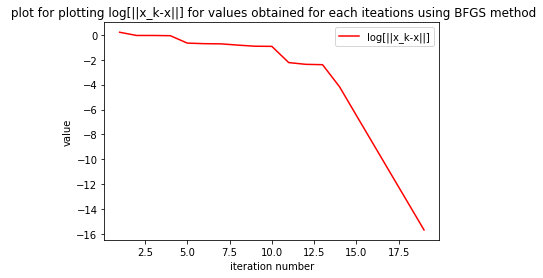

In [277]:
plt.plot([i+1 for i in range(iter_bfgs-1)],ln_values_bfgs,label='log[||x_k-x||]',color='r')
plt.title(' plot for plotting log[||x_k-x||] for values obtained for each iteations using BFGS method')
plt.xlabel('iteration number')
plt.ylabel("value")
plt.legend()
plt.show()

$\text{Prepare a different plot for plotting log} (|f(x_k
) − f(x^*)|) \\ \text{ obtained from BFGS method against the
iterations.}$


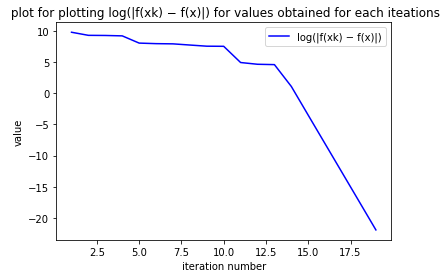

In [278]:
plt.plot([i+1 for i in range(iter_bfgs-1)],ln_values_fun_bfgs,label='log(|f(xk) − f(x)|)',color='b')
plt.title(' plot for plotting log(|f(xk) − f(x)|) for values obtained for each iteations')
plt.xlabel('iteration number')
plt.ylabel("value")
plt.legend()
plt.show()

$\text{Comment on the convergence rates of the iterates and the objective function values obtained by BFGS
method.} $

$\large \text{Answer:}$

$\text{As we calculate above the condition to be Q linear  is  } $ 

 $$log(||x^{k+1} - x^*||_2)-log(||x^k - x^*||_2)\leq 0$$ 

 $\text{In above plot for } ||x_k-x^*||_2  \text{Value is decreasing as soon as k increases and also for sufficient large k, we can see that value of  } ||x_k-x^*||_2 \\   \text{also decreases with k so our above condition holds for bfgs method also. similarly if we see the } \\ ||f(x_k)-f(x^*)||_2  \text{then we can observe that these values are also decreasing as k increases }\\ \textbf{So the convergence of the function is Q linear.}$

$\large \text{Question 4.} \\
\textbf{[R] Compare and contrast the results obtained by Newton’s method and BFGS method and comment on the
time taken by both the methods.
}$

In [279]:
from tabulate import tabulate

In [280]:
table = [["x_bar_val", "newton's x_val ","BFGS x_val"]]
for i in  range(10):
    table.append([x_bar[i] , x_star[i],x_star_bfgs[i] ])    
print(tabulate(table, headers = 'firstrow',tablefmt="grid"))

+-------------+-------------------+--------------+
|   x_bar_val |   newton's x_val  |   BFGS x_val |
+=============+===================+==============+
|  -0.0625871 |        -0.0498225 |   -0.0498225 |
+-------------+-------------------+--------------+
|   1.94307   |         1.9519    |    1.9519    |
+-------------+-------------------+--------------+
|  -2.34151   |        -2.34298   |   -2.34298   |
+-------------+-------------------+--------------+
|   3.58253   |         3.60956   |    3.60956   |
+-------------+-------------------+--------------+
|  -4.75948   |        -4.71176   |   -4.71176   |
+-------------+-------------------+--------------+
|   5.93512   |         5.89878   |    5.89878   |
+-------------+-------------------+--------------+
|  -6.61893   |        -6.62879   |   -6.62879   |
+-------------+-------------------+--------------+
|   7.16818   |         7.16821   |    7.16821   |
+-------------+-------------------+--------------+
|  -8.218     |        -8.22221

In [281]:
print('difference based on iteration taken:\n ********************************************')
print('number of iterations taken by newton method',iterations)
print('number of iterations taken by BFGS method',iter_bfgs)

difference based on iteration taken:
 ********************************************
number of iterations taken by newton method 5
number of iterations taken by BFGS method 20


In [282]:
print('difference based on time taken : \n ***************************************************')
print('time taken by newton method',time_taken_newton)
print('time taken by BFGS method',time_taken_bfgs)

difference based on time taken : 
 ***************************************************
time taken by newton method 0.008049338999626343
time taken by BFGS method 0.025448735999816563


$\text{BY above results we can see that if we observe the values of x then it can easily  be seen that there is no proper difference in values of x } \\ \text{that means both the methods approximate the x value almost same. }$

$\text{As we see the number of iterations taken to reach to optimality condition is higher in bfgs method in comparison of newton's method.}$

$\textbf{Observations over time taken to solve:} \\ \text{As we can see that newton's method take less time to solve the problem and leads the x value to optimal value in less time than bfgs method.}$